# **Exploratory Data Analysis Lab**


In this notebook, we get to work with the cleaned dataset from the previous notebook.

Now, we will perform the task of exploratory data analysis.

We will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


Let's begin with import of the pandas module.


In [52]:
import pandas as pd

Then, loading the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


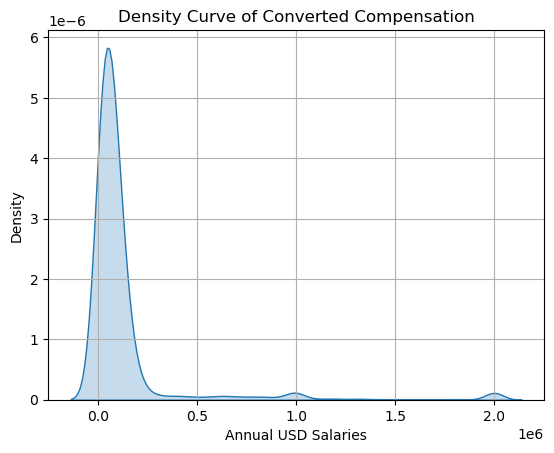

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(df['ConvertedComp'], fill=True)

# Plot formatting
plt.title('Density Curve of Converted Compensation')
plt.xlabel('Annual USD Salaries')
plt.grid(True) 


Plotting the histogram for the column `ConvertedComp`.


Text(0, 0.5, 'Number of Respondents')

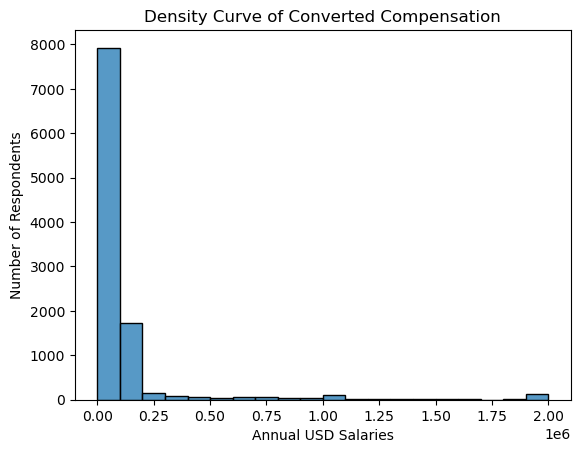

In [29]:

sns.histplot(df['ConvertedComp'], kde=False, bins = 20)

# Plot formatting
plt.title('Density Curve of Converted Compensation')
plt.xlabel('Annual USD Salaries')
plt.ylabel('Number of Respondents')

Let's find the median of the column `ConvertedComp`?


In [31]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

How many responders identified themselves only as a **Man**?


In [33]:
df[df['Gender'] == 'Man']['Gender'].value_counts()

Gender
Man    10480
Name: count, dtype: int64

Finding out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [34]:
df['ConvertedComp'][(df.Gender == 'Woman')].describe()

count    6.790000e+02
mean     1.011031e+05
std      2.202510e+05
min      0.000000e+00
25%      2.654650e+04
50%      5.770800e+04
75%      9.500000e+04
max      2.000000e+06
Name: ConvertedComp, dtype: float64

The five number summary for the column `Age`?


In [64]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plotting a histogram of the column `Age`.


Text(0.5, 0, 'Interval Age')

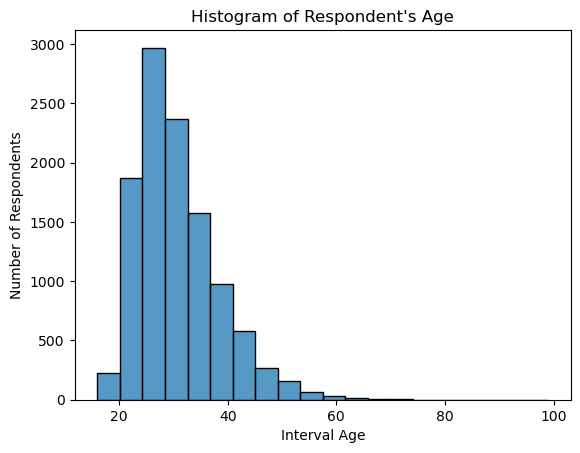

In [39]:
sns.histplot(df['Age'].dropna(), kde = False, bins = 20)
plt.title("Histogram of Respondent's Age")
# add y-label
plt.ylabel('Number of Respondents')
# add x-label
plt.xlabel('Interval Age')

### Finding outliers


Text(0.5, 0, 'Annual USD Salary')

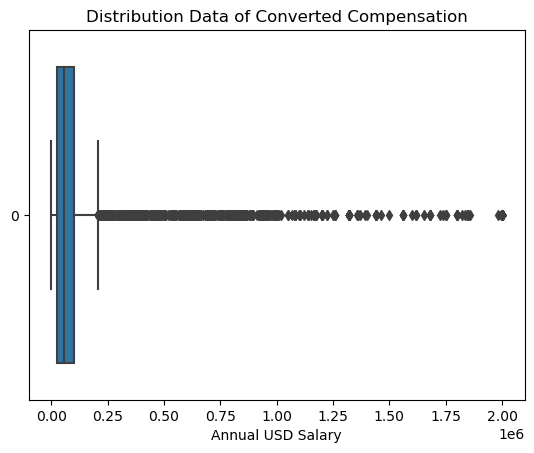

In [87]:
sns.boxplot(data = df['ConvertedComp'], orient = 'h')
plt.title('Distribution Data of Converted Compensation')
plt.xlabel('Annual USD Salary')

Finding out the Inter Quartile Range for the column `ConvertedComp`.


In [40]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 -  Q1

IQR

73132.0

Finding out the upper and lower bounds.


In [41]:
up_bound = Q3 + IQR*1.5
print('Upper bound:', up_bound)

lw_bound = Q1 - IQR*1.5
print('Lower bound:', lw_bound)

Upper bound: 209698.0
Lower bound: -82830.0


Identifying how many outliers are there in the `ConvertedComp` column.


In [42]:
outliers = 0

for x in df['ConvertedComp']:
    if (x > up_bound) or (x < lw_bound) :
        outliers += 1

print('Total outliers in the column are', outliers)

Total outliers in the column are 879



What is the median ConvertedComp before removing outliers?

In [43]:
df['ConvertedComp'].quantile(0.5)

57745.0

Let's create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [50]:
filtered_df = df[(df['ConvertedComp'] >= lw_bound) & (df['ConvertedComp'] <= up_bound)]
df1 = pd.DataFrame(filtered_df)

In [51]:
df1.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,9703.000000,9.703000e+03,9703.000000,9664.000000,7612.000000,9493.000000
mean,12501.007317,7.241139e+05,59883.208389,41.864782,4.737455,30.695860
std,7235.627217,7.186806e+06,43394.336755,24.613489,4.420472,7.346625
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6237.000000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12571.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18787.500000,1.150000e+05,85574.500000,42.000000,5.000000,34.000000
max,25141.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


### Finding correlation


Finding the correlation between `Age` and all other numerical columns.


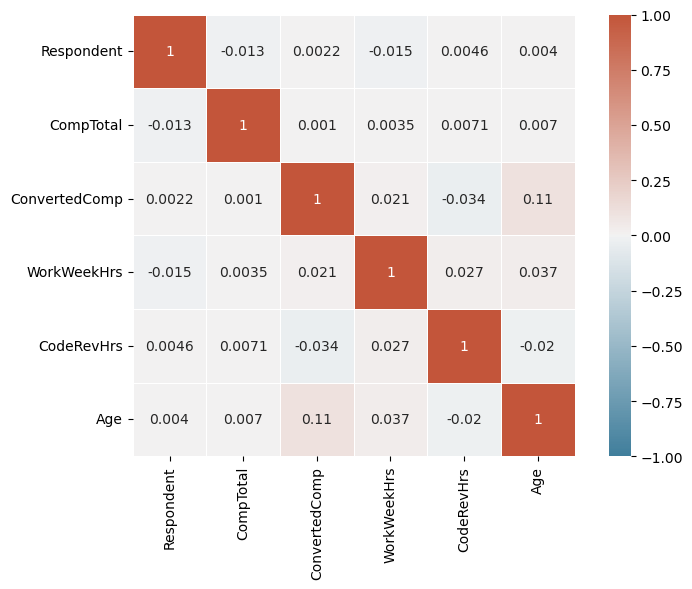

In [61]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr = numeric_df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap=cmap, annot=True, center=0, vmin=-1, square=True, linewidths=.5)
plt.tight_layout()
plt.show()

 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
